In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import PIL
import tensorflow as tf
from tensorflow import keras
import pathlib

In [6]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

In [7]:
data_dir = tf.keras.utils.get_file(origin=dataset_url, 
                                   fname='flower_photos', 
                                   cache_dir = '.',
                                   untar=True)
data_dir = pathlib.Path(data_dir)

In [8]:
roses = list(data_dir.glob('roses/*'))

In [9]:
roses[:5]

[WindowsPath('datasets/flower_photos/roses/10090824183_d02c613f10_m.jpg'),
 WindowsPath('datasets/flower_photos/roses/102501987_3cdb8e5394_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/10503217854_e66a804309.jpg'),
 WindowsPath('datasets/flower_photos/roses/10894627425_ec76bbc757_n.jpg'),
 WindowsPath('datasets/flower_photos/roses/110472418_87b6a3aa98_m.jpg')]

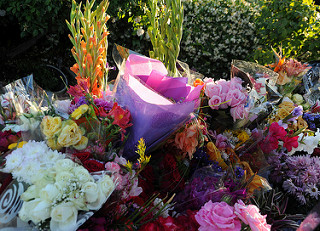

In [10]:
PIL.Image.open(str(roses[3]))

In [11]:
flowers_image_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [12]:
flower_labels = {
     'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [13]:
img = cv2.imread(str(flowers_image_dict['roses'][2]))
img

array([[[ 0,  3,  1],
        [ 0,  3,  1],
        [ 0,  2,  0],
        ...,
        [ 0,  3,  2],
        [ 0,  1,  5],
        [ 0,  0,  4]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 4,  0,  0],
        [ 3,  1,  0],
        [ 5,  3,  2]],

       [[ 0,  2,  0],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 2,  6, 11],
        [ 0,  3,  7],
        [ 0,  2,  6]],

       ...,

       [[ 0,  3,  1],
        [ 0,  2,  0],
        [ 0,  3,  1],
        ...,
        [ 1,  3,  4],
        [ 2,  4,  5],
        [ 0,  0,  1]],

       [[ 0,  3,  1],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 0,  3,  7],
        [ 4,  6,  7],
        [ 0,  1,  2]],

       [[ 0,  3,  1],
        [ 0,  2,  0],
        [ 0,  2,  0],
        ...,
        [ 0,  3,  7],
        [ 2,  5,  9],
        [ 1,  2,  6]]], dtype=uint8)

In [14]:
img.shape

(333, 500, 3)

In [15]:
X, y = [], []

for flower_name, images in flowers_image_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resize_img = cv2.resize(img,(180,180))
        X.append(resize_img)
        y.append(flower_labels[flower_name])

In [16]:
X = np.array(X)
y = np.array(y)

In [17]:
X = X / 255

In [18]:
X[0]

array([[[0.00392157, 0.0627451 , 0.02745098],
        [0.00392157, 0.0627451 , 0.02745098],
        [0.00392157, 0.06666667, 0.03529412],
        ...,
        [0.09019608, 0.19607843, 0.12156863],
        [0.09803922, 0.2       , 0.1254902 ],
        [0.10196078, 0.20392157, 0.12941176]],

       [[0.03921569, 0.09019608, 0.05882353],
        [0.03921569, 0.09019608, 0.05882353],
        [0.03529412, 0.08627451, 0.05490196],
        ...,
        [0.07843137, 0.17254902, 0.11764706],
        [0.09019608, 0.18431373, 0.12941176],
        [0.10196078, 0.19607843, 0.14117647]],

       [[0.05098039, 0.07843137, 0.05098039],
        [0.04705882, 0.07843137, 0.05098039],
        [0.04313725, 0.0745098 , 0.04705882],
        ...,
        [0.08235294, 0.16862745, 0.11764706],
        [0.08627451, 0.17647059, 0.12156863],
        [0.09803922, 0.18823529, 0.13333333]],

       ...,

       [[0.04705882, 0.09411765, 0.07058824],
        [0.04313725, 0.08627451, 0.05882353],
        [0.04705882, 0

In [19]:
len(y)

3670

In [20]:
X.shape

(3670, 180, 180, 3)

In [21]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.2, random_state=0, stratify=y)

In [25]:
model_ = keras.Sequential([
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
    
])

model_.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model_.fit(X_train, y_train, epochs=30)

Epoch 1/30
23/23 [==============================] - 26s 646ms/step - loss: 1.8130 - accuracy: 0.2657
Epoch 2/30
23/23 [==============================] - 15s 639ms/step - loss: 1.4146 - accuracy: 0.4033
Epoch 3/30
23/23 [==============================] - 15s 641ms/step - loss: 1.1559 - accuracy: 0.5381
Epoch 4/30
23/23 [==============================] - 15s 641ms/step - loss: 0.9789 - accuracy: 0.6144
Epoch 5/30
23/23 [==============================] - 15s 643ms/step - loss: 0.7821 - accuracy: 0.7084
Epoch 6/30
23/23 [==============================] - 15s 642ms/step - loss: 0.6244 - accuracy: 0.7779
Epoch 7/30
23/23 [==============================] - 15s 650ms/step - loss: 0.4280 - accuracy: 0.8542
Epoch 8/30
23/23 [==============================] - 15s 643ms/step - loss: 0.2765 - accuracy: 0.9005
Epoch 9/30
23/23 [==============================] - 15s 640ms/step - loss: 0.1902 - accuracy: 0.9401
Epoch 10/30
23/23 [==============================] - 15s 659ms/step - loss: 0.1261 - accura

In [26]:
model_.evaluate(X_test, y_test)

92/92 [==============================] - 20s 183ms/step - loss: 3.7988 - accuracy: 0.5153


[3.798811912536621, 0.515326976776123]

In [2]:
data_augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal',input_shape=(180,180,3)),
    keras.layers.experimental.preprocessing.RandomRotation(0.1),
    keras.layers.experimental.preprocessing.RandomZoom(0.1)
])

In [27]:
model = keras.Sequential([
    data_augmentation,
    keras.layers.Conv2D(16, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64, 3, padding='same', activation='relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(5, activation='sigmoid')
    
])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])

model.fit(X_train, y_train, epochs=30)

Epoch 1/30
23/23 [==============================] - 22s 766ms/step - loss: 1.7481 - accuracy: 0.2602
Epoch 2/30
23/23 [==============================] - 18s 767ms/step - loss: 1.4285 - accuracy: 0.3951
Epoch 3/30
23/23 [==============================] - 17s 755ms/step - loss: 1.2014 - accuracy: 0.4905
Epoch 4/30
23/23 [==============================] - 17s 752ms/step - loss: 1.1179 - accuracy: 0.5204
Epoch 5/30
23/23 [==============================] - 17s 747ms/step - loss: 1.0267 - accuracy: 0.5899
Epoch 6/30
23/23 [==============================] - 17s 752ms/step - loss: 1.0026 - accuracy: 0.5872
Epoch 7/30
23/23 [==============================] - 17s 747ms/step - loss: 0.9490 - accuracy: 0.6076
Epoch 8/30
23/23 [==============================] - 17s 751ms/step - loss: 0.9407 - accuracy: 0.6199
Epoch 9/30
23/23 [==============================] - 17s 752ms/step - loss: 0.8737 - accuracy: 0.6594
Epoch 10/30
23/23 [==============================] - 17s 749ms/step - loss: 0.8210 - accura

In [28]:
model.evaluate(X_test,y_test)

92/92 [==============================] - 20s 204ms/step - loss: 1.2054 - accuracy: 0.6417


[1.2053735256195068, 0.6416893601417542]

In [29]:
from sklearn.metrics import classification_reportssification_report

In [30]:
y_pred = model.predict(X_test)

In [31]:
y_pred[:5]

array([[9.9131787e-01, 2.2734493e-02, 9.9973887e-02, 3.0941045e-01,
        7.7184141e-01],
       [3.1164861e-01, 3.6875308e-02, 9.6982127e-01, 7.0282519e-02,
        2.5669599e-01],
       [9.3789113e-01, 9.8963064e-01, 5.7651758e-02, 5.4391094e-05,
        3.4673542e-01],
       [9.8029339e-01, 4.6998382e-02, 2.3786634e-02, 1.9806883e-05,
        9.9413949e-01],
       [7.6295912e-01, 9.9913609e-01, 4.6389830e-01, 2.9546214e-05,
        3.7568212e-03]], dtype=float32)

In [32]:
y_preds = [np.argmax(i) for i in y_pred]

In [33]:
y_preds[:5]

[0, 2, 1, 4, 1]

In [34]:
y_test[:5]

array([0, 2, 1, 4, 1])

In [36]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.57      0.44      0.50       513
           1       0.68      0.65      0.66       506
           2       0.68      0.71      0.69       719
           3       0.70      0.75      0.73       559
           4       0.56      0.63      0.60       639

    accuracy                           0.64      2936
   macro avg       0.64      0.64      0.63      2936
weighted avg       0.64      0.64      0.64      2936

